In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
X = np.random.normal(size=100,)

In [62]:
y = 3 + 4*X + np.random.normal(size=100)

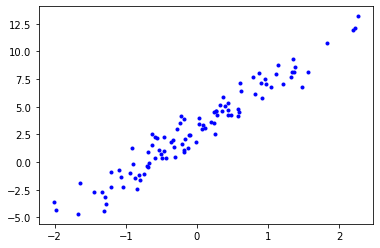

In [63]:
plt.plot(X,y,'.b')

In [64]:
X = np.column_stack((np.ones(X.shape[0]),X))

In [65]:
class LinearRegresssion():
    def predict(self,X):
        return X@self.w
    
    def loss(self,X,y):
        e = (self.predict(X) - y)
        
        return (1/2)*(np.transpose(e)@e)
    
    def calculate_gradient(self,X,y):
        return np.transpose(X)@(self.predict(X) - y)
    
    def update_weights(self,lr,grad):
        self.w -= lr*grad
        return self.w
    
    def gradient_descent(self,X,y,lr=0.001,epochs=10):
        self.w = np.zeros(X.shape[-1])
        self.gradient_errors =[]
        
        for _ in range(epochs):
            loss = self.loss(X,y)
            self.gradient_errors.append(loss)
            
            dJdw = self.calculate_gradient(X,y)
            
            self.w = self.update_weights(lr,dJdw)
            
        return self.w,self.gradient_errors
        
    def mini_batch_gradient_descent(self,X,y,batch_size=1,lr=0.001,epochs=100):
        self.w = np.zeros(X.shape[-1])
        self.w_all = []
        self.error_all = []
        mini_batch_id = 0
        
        for _ in range(epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            
            for i in range(0,X.shape[0],batch_size):
                mini_batch_id += 1
                xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]
                
                
                self.w_all.append(self.w)
                self.error_all.append(self.loss(xi,yi))
                
                dJdw = 2/batch_size * self.calculate_gradient(xi,yi)
                self.w = self.update_weights(lr,dJdw)
                
                
    
        return self.w_all,self.error_all

In [66]:
lin_reg = LinearRegresssion()

In [67]:
weights,ge = lin_reg.gradient_descent(X,y)

In [68]:
weights

array([1.94816647, 2.40697037])

In [69]:
weights,errors = lin_reg.mini_batch_gradient_descent(X,y)

In [70]:
weights[-1]

array([3.0222396 , 4.06950562])

In [105]:
class LinearRegression2():
    def predict(self,X):
        return X@self.w
    def loss(self,X,y):
        e = (self.predict(X) - y)
        return (1/2)*np.transpose(e)@e
    def calculate_gradient(self,X,y):
        return np.transpose(X)@(self.predict(X) - y)
    
    def update_weights(self,lr,grad):
        return (lr*grad)
    
    
    def gradient_descent(self,X,y,lr=0.01,epochs=500):
        self.w = np.zeros(X.shape[-1])
        self.w_all = []
        self.errors_all = []
        
        for _ in range(epochs):
            self.errors_all.append(self.loss(X,y))
            dJdw = self.calculate_gradient(X,y)
            
            self.w -= self.update_weights(lr,dJdw)
            self.w_all.append(self.w)
            
        return self.w_all,self.errors_all
    
    def mbgd(self,X,y,batch_size,lr=0.01,epochs=500):
        self.w = np.zeros(X.shape[-1])
        self.w_all = []
        self.errors_all = []
        
        for _ in range(epochs):
            shuffled_index = np.random.permutation(X.shape[0])
            
            X_shuffled = X[shuffled_index]
            y_shuffled = y[shuffled_index]
            
            for i in range(0,X.shape[0],batch_size):
                xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]
                self.w_all.append(self.w)
                self.errors_all.append(self.loss(xi,yi))
                
                dJdw = (2/batch_size)*self.calculate_gradient(xi,yi)
                
                self.w -= self.update_weights(lr,dJdw)
                
        return self.errors_all,self.w_all
    

In [106]:
lin_reg = LinearRegression2()

In [107]:
w,e = lin_reg.gradient_descent(X,y)

In [108]:
e[-1]

47.81940854497563

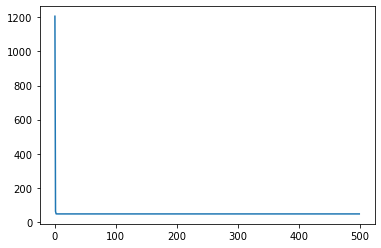

In [109]:
plt.plot(e)

In [116]:
e_mbdg,w_mbgd = lin_reg.mbgd(X,y,batch_size=10)

In [117]:
w_mbgd[-1]

array([3.02259905, 4.07184799])

In [118]:
e_mbdg[-1]

6.704976256994061